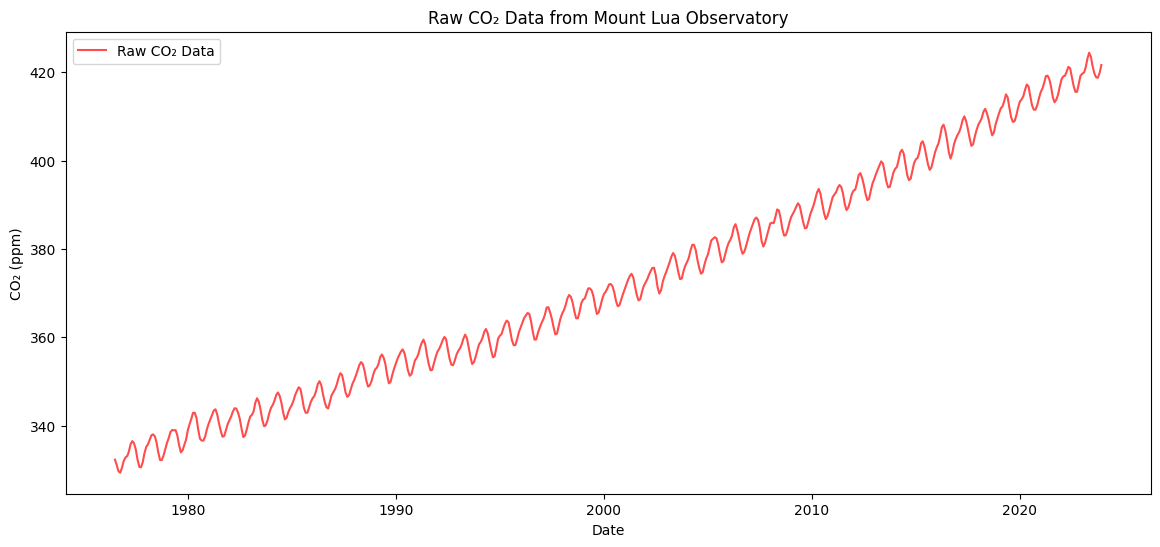

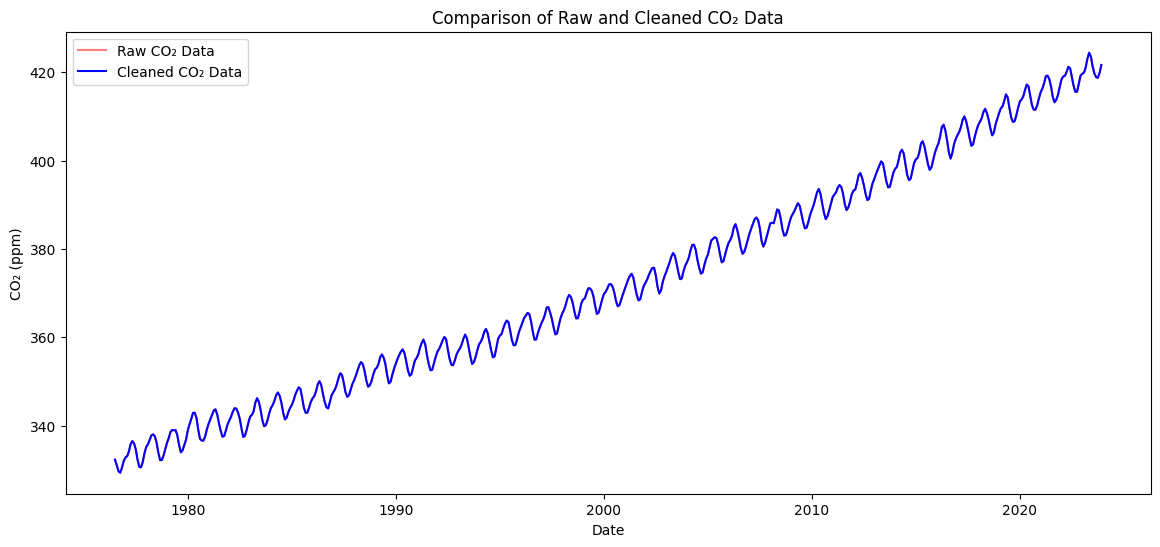

In [7]:
# combined_plot_mount_lua.ipynb
# This notebook analyzes and visualizes CO₂ data using FFT-based techniques from preparation.py module.

# Importing necessary libraries and the preparation module
import preparation
import pandas as pd
import matplotlib.pyplot as plt

# Load CO₂ data
file_path = 'mauna-loa-data/flask_monthly.json'
raw_co2_series = preparation.get_timeseries(file_path)

# Plot the raw CO₂ data
plt.figure(figsize=(14, 6))
plt.plot(raw_co2_series, label='Raw CO₂ Data', color='red', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("CO₂ (ppm)")
plt.title("Raw CO₂ Data from Mount Lua Observatory")
plt.legend()
plt.show()

# Clean the data by dropping missing values
cleaned_co2_series = raw_co2_series.dropna()
cleaned_co2_series = cleaned_co2_series[cleaned_co2_series > 0]

"""
# Pad the data (optional step for FFT stability)
padded_series = preparation.pad_data(cleaned_co2_series, pad_width=100)

# Apply windowing to reduce spectral leakage
windowed_series = preparation.apply_window(padded_series, window_type="hann")

# Perform FFT to analyze frequency components
sampling_rate = 1  # Assuming a uniform sampling interval
freq_series = preparation.calculate_fft(windowed_series, sampling_rate=sampling_rate)

# Remove noise by filtering out low and high frequencies
low_cutoff = 0.01  # Low frequency cutoff in Hz (adjust based on data characteristics)
high_cutoff = 0.1  # High frequency cutoff in Hz (adjust based on data characteristics)
filtered_freq_series = preparation.remove_noise(freq_series, low_cutoff=low_cutoff, high_cutoff=high_cutoff)

# Detect peak frequencies in the filtered power spectrum
peak_freqs = preparation.find_peak_frequencies(filtered_freq_series, height=10)

print("Detected Peak Frequencies:", peak_freqs)

# Perform inverse FFT to transform filtered frequency data back to the time domain
filtered_time_series = preparation.calculate_inverse_fft(filtered_freq_series)

# Undo windowing and padding (return data to original length)
unpadded_series = preparation.unpad_data(pd.Series(filtered_time_series, index=padded_series.index), len(cleaned_co2_series))
"""

# Plot the combined data (raw and cleaned)
plt.figure(figsize=(14, 6))
plt.plot(raw_co2_series, label='Raw CO₂ Data', color='red', alpha=0.5)
plt.plot(cleaned_co2_series, label='Cleaned CO₂ Data', color='blue')
# plt.plot(cleaned_co2_series.index, unpadded_series, label='Processed CO₂ Data (FFT Filtered)', color='red')
plt.xlabel("Date")
plt.ylabel("CO₂ (ppm)")
plt.title("Comparison of Raw and Cleaned CO₂ Data")
plt.legend()
plt.show()
